In [1]:
# Import Pytorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Import dataloader
from torch.utils.data import DataLoader

# Check version
print(f"PyTorch version: {torch.__version__} \n torchvision version: {torchvision.__version__}")

device = "cuda" if torch.cuda.is_available() else "cpu"
device

/usr/local/lib/python3.6/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


PyTorch version: 1.9.0 
 torchvision version: 0.10.0a0+300a8a4


'cuda'

/usr/local/lib/python3.6/dist-packages/torchvision-0.10.0a0+300a8a4-py3.6-linux-aarch64.egg/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /media/nvidia/NVME/pytorch/pytorch-v1.9.0/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


train_data type is torchvision.datasets.mnist.FashionMNIST
the len of train data is 60000 
 the len of test data is 10000
the train_data[0] image shape is torch.Size([1, 28, 28]) and the label is 9
class name is ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Text(0.5, 1.0, 'Ankle boot')

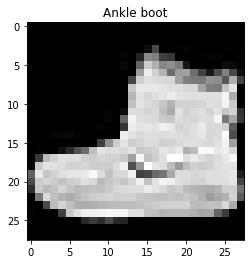

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
        root="data", # where to download data to ?
        train=True, # get training data
        download=True, # download data if it doesn't exist on disk
        transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
        target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

# See first training sample
image, label = train_data[0]
class_names = train_data.classes
print(f"train_data type is {type(train_data)}")
print(f"the len of train data is {len(train_data.data)} \n the len of test data is {len(test_data.data)}")
print(f"the train_data[0] image shape is {image.shape} and the label is {label}")
print(f"class name is {class_names}")

# Visualizing our data
plt.imshow(image.squeeze()) # image shape is [1, 28, 28](colour channels, height, width)
plt.title(label)
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])



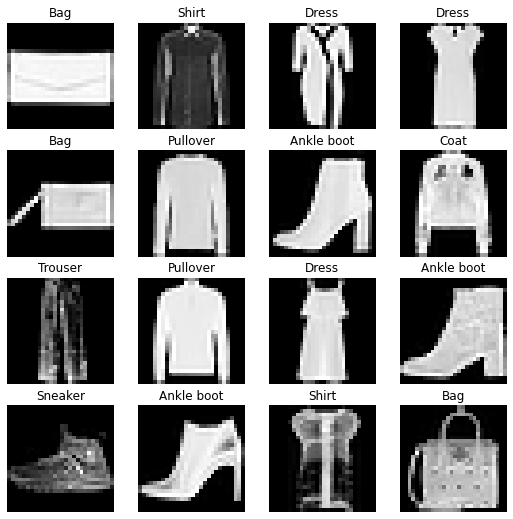

In [3]:
fig = plt.figure(figsize=(9, 9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

In [4]:
# Setup batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterable (batches)
train_dataloader = DataLoader(train_data, #dataset to turn into iterable
                             batch_size=BATCH_SIZE, # how many samples per batch
                             shuffle=True # shuffle data every epoch
                             )

test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

# Checkout what we've created
print(f"Dataloader: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader:{len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of train dataloader:{len(test_dataloader)} batches of {BATCH_SIZE}")


                              

Dataloader: (<torch.utils.data.dataloader.DataLoader object at 0x7f343b0438>, <torch.utils.data.dataloader.DataLoader object at 0x7f343b0860>)
Length of train dataloader:1875 batches of 32
Length of train dataloader:313 batches of 32


In [5]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 3, label size: torch.Size([])


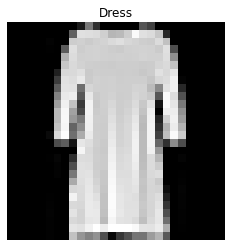

In [6]:
# Show a sample
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off")
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [7]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

print(x)
print(output)
      
      

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.2549, 0.2118, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0235, 0.4706, 0.1882, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.8784, 0.8627, 0.8353, 0.8118, 0.9529, 0.9490, 0.9255,
          0.8235, 0.8510, 0.9529, 0.5725, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0157, 0.7882, 0.7843, 0.8078, 0.8196, 0.8510, 0.8196, 0.8431,
          0.8431, 0.8627, 0.8863, 0.6471, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 

In [8]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(nn.Flatten(), # neural networks like their inputs in vector form
                                        nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sapmle (784 pixels)
                                        nn.Linear(in_features=hidden_units, out_features=output_shape)
                                        )
    def forward(self, x):
        return self.layer_stack(x)

# Need to setup model with input parameters
model_0 = FashionMNISTModelV0(input_shape=784, hidden_units=10, output_shape=len(class_names))
model_0.to(device)

    

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [9]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [10]:
from tqdm.auto import tqdm
# Set the number of epochs
epochs = 3

# Create trainning and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    # Training
    train_loss = 0
    # Add a loop to loop through trainning batches
    for batch, (X, y) in enumerate(train_dataloader):
        
        X = X.to(device)
        y = y.to(device)
        
        # 0. Training
        model_0.train()
        
        # 1. Forward pass
        y_pred = model_0(X)
        
        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        
        # 4. Loss backward
        loss.backward()
        
        # 5. Optimizer step
        optimizer.step()
        
        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
            
    train_loss /= len(train_dataloader)
    print(f"loss is : {train_loss}")
    
    # Testing
    test_loss = 0
    model_0.eval()
    with torch.inference_mode():
        for X,y in test_dataloader:
            X,y = X.to(device), y.to(device)
            # 1. Forward pass
            test_pred = model_0(X)
            
            # 2. Calculate loss
            test_loss += loss_fn(test_pred, y)
        
        test_loss /= len(test_dataloader)
        
    print(f"Train loss:{train_loss:.5f} | Test loss:{test_loss:.5f}")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
loss is : 0.5888516306877136


 33%|███▎      | 1/3 [00:59<01:58, 59.25s/it]

Train loss:0.58885 | Test loss:0.51111
Epoch: 1
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
loss is : 0.4732713997364044


 67%|██████▋   | 2/3 [01:46<00:51, 51.97s/it]

Train loss:0.47327 | Test loss:0.50132
Epoch: 2
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
loss is : 0.4525602161884308


100%|██████████| 3/3 [02:33<00:00, 51.01s/it]

Train loss:0.45256 | Test loss:0.46670


In [11]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists")
else:
    print("Downloading helper_functions.py")
    # Note: you need the "raw" Github URL for this to work
    request = requests.get("https://raw.githubusercontent.com/pendingbit/pytorch-deep-learning/blob/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)


helper_functions.py already exists


In [12]:
from helper_functions import accuracy_fn
def eval_model(model:torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn:torch.nn.Module,accuracy_fn, device:torch.device=device):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X , y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
            
        loss /= len(data_loader)
        acc /= len(data_loader)
    
    return {"model_name" : model.__class__.__name__,
           "model_loss" : loss.item(),
           "model_acc" : acc}

model_0_results = eval_model(model=model_0, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device=device)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4667026400566101,
 'model_acc': 83.35662939297124}

In [13]:
from timeit import default_timer as timer
def print_train_time(start:float, end:float, device:torch.device=None):
    total_time = end -start
    print(f"Train time on {device} : {total_time:.3f} seconds")
    return total_time

In [14]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        ) 
            
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [15]:
model_1 = FashionMNISTModelV1(input_shape=784, hidden_units=10, output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [16]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.1)

In [17]:
def train_step(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              optimizer:torch.optim.Optimizer,
              accuracy_fn,
              device:torch.device=device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X,y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)
        
        # 1. Forward pass
        y_pred = model(X)
        
        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        
        # 4. Loss backward
        loss.backward()
        
        # 5. Optimizer step
        optimizer.step()
        
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")
    
def test_step(data_loader:torch.utils.data.DataLoader,
             model:torch.nn.Module,
             loss_fn:torch.nn.Module,
             accuracy_fn,
             device:torch.device=device):
    test_loss, test_acc = 0,0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            X,y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
            
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%")
    

In [18]:
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----------")
    train_step(data_loader=train_dataloader,
              model=model_1,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn
              )
    test_step(data_loader=test_dataloader,
             model=model_1,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn)
    
train_time_end_on_gpu = timer()
total_train_time_mdel_1 = print_train_time(start=train_time_start_on_gpu,
                                          end=train_time_end_on_gpu,
                                          device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----------
Train loss: 0.85295 | Train accuracy: 69.44%


 33%|███▎      | 1/3 [00:49<01:39, 49.61s/it]

Test loss: 0.71810 | Test accuracy: 73.99%
Epoch: 1
-----------
Train loss: 0.69358 | Train accuracy: 74.91%


 67%|██████▋   | 2/3 [01:39<00:49, 49.56s/it]

Test loss: 0.72638 | Test accuracy: 73.55%
Epoch: 2
-----------
Train loss: 0.66507 | Train accuracy: 75.66%


100%|██████████| 3/3 [02:28<00:00, 49.53s/it]

Test loss: 0.66468 | Test accuracy: 76.04%
Train time on cuda : 148.612 seconds


In [19]:
model_1_results = eval_model(model=model_1, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device=device)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6646841764450073,
 'model_acc': 76.03833865814697}

In [20]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
            )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
            )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                     out_features=output_shape)
            )
    def forward(self, x:torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        
        return x
    
model_2 =FashionMNISTModelV2(input_shape=1, hidden_units=10,output_shape=len(class_names)).to(device)
model_2
    

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [21]:
# Setup  loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.1)

In [22]:
# Measure time
from timeit import default_timer as timer
train_time_start = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
               model=model_2,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device
        )
    test_step(data_loader=train_dataloader,
             model=model_2,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device
        )
    
train_time_end = timer()
print_train_time(start=train_time_start, end=train_time_end,device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /media/nvidia/NVME/pytorch/pytorch-v1.9.0/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Train loss: 0.63496 | Train accuracy: 76.83%


 33%|███▎      | 1/3 [03:06<06:12, 186.16s/it]

Test loss: 0.35768 | Test accuracy: 87.09%
Epoch: 1
---------
Train loss: 0.34250 | Train accuracy: 87.78%


 67%|██████▋   | 2/3 [04:50<02:17, 137.85s/it]

Test loss: 0.30443 | Test accuracy: 89.19%
Epoch: 2
---------
Train loss: 0.30905 | Train accuracy: 88.91%


100%|██████████| 3/3 [06:34<00:00, 131.46s/it]

Test loss: 0.31182 | Test accuracy: 88.31%
Train time on cuda : 394.387 seconds


394.38650231800057

In [23]:
model_0_results = eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)
model_1_results = eval_model(model=model_1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)
model_2_results = eval_model(model=model_2,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)


In [24]:
import pandas as pd
compare_result = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_result


,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.466703,83.356629
1,FashionMNISTModelV1,0.664684,76.038339
2,FashionMNISTModelV2,0.349466,86.801118


Text(0, 0.5, 'model')

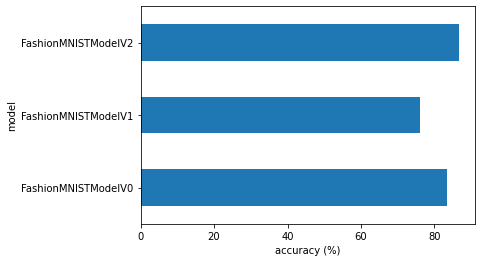

In [25]:
# Visualize our model_results
compare_result.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

In [26]:
def make_predictions(model:torch.nn.Module, data:list, device:torch.device=device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample 
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device
            
            # Forward pass
            pred_logit = model(sample)
            
            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            
            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    return torch.stack(pred_probs)

In [27]:
import random
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)
    
print(f"Test sample image shape: {test_samples[0].shape}\n Test sample label:{test_labels[0]} ({class_names[test_labels[0]]})")
print(len(test_samples))
      

Test sample image shape: torch.Size([1, 28, 28])
 Test sample label:1 (Trouser)
9


In [28]:
pred_probs = make_predictions(model=model_2, data=test_samples)

pred_probs[:2]
pred_probs.shape

torch.Size([9, 10])

In [29]:
pred_classes = pred_probs.argmax(dim=1)
test_labels,pred_classes

([1, 1, 3, 5, 5, 6, 2, 3, 8], tensor([1, 1, 3, 5, 5, 2, 2, 3, 6]))

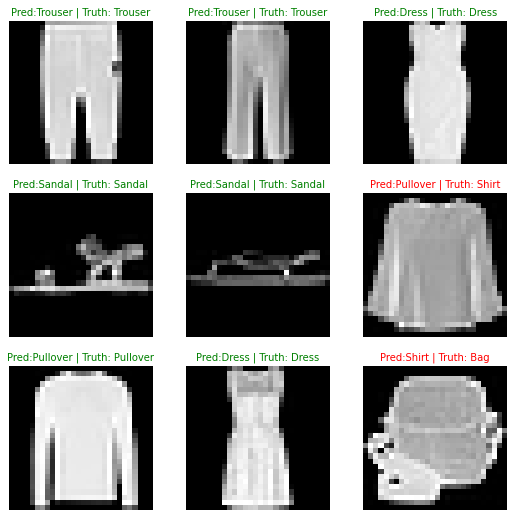

In [30]:
# Plost predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols =3
for i, sample in enumerate(test_samples):
    # Create a subplot
    plt.subplot(nrows, ncols, i+1)
    
    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")
    
    # Find the prediction label
    pred_label = class_names[pred_classes[i]]
    
    # Get the truth label
    truth_label = class_names[test_labels[i]]
    
    # Create the title text of the plot
    title_text = f"Pred:{pred_label} | Truth: {truth_label}"
    
    # Check for equality and change title colour accordingly
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g") # green for correct
    else:
        plt.title(title_text, fontsize=10, c="r") # red for wrong
    plt.axis(False)